In [1]:
import pandas as pd
import sklearn as scikit
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Initialize data to be from the excel sheet
file_name = "default of credit card clients.xls"
raw_data = pd.read_excel(file_name)

In [3]:
print(raw_data)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

NOTE: Our original data has the labels underneath arbitrary x1,x2,...xn labels. We will omit fix the formate of the dataframe first to have the proper labels in the dataframe.

In [4]:
# Format of data frame is configured incorrectly. We will fix format here...
# Fixing the dataframes labels...
raw_data.columns = raw_data.iloc[0]
# Removing labels from being within the dataframe...
raw_data = raw_data.iloc[1:,:]
#Removing first column ID from within the dataframe as not relevent to our models
raw_data = raw_data.iloc[:,1:]


raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now with our data initialized, lets take a moment to explore the distribution of our classes

In [5]:
# Define a function to plot the distribution of a column
def plot_distribution(df, column):
    # Get the number of unique values in the column
    num_unique_values = df[column].nunique()
    df[column].hist(bins=num_unique_values, figsize=(10,5))
    plt.xlabel(column)
    plt.ylabel('Number of people')
    plt.title(f'Distribution of {column}')
    plt.show()

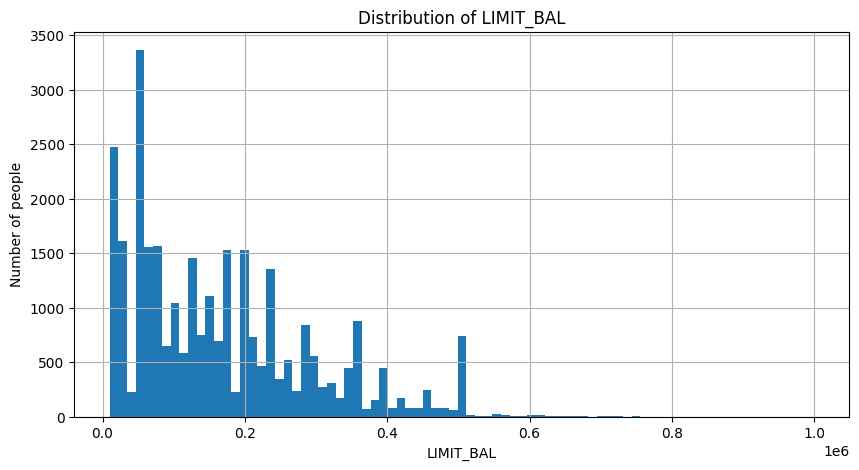

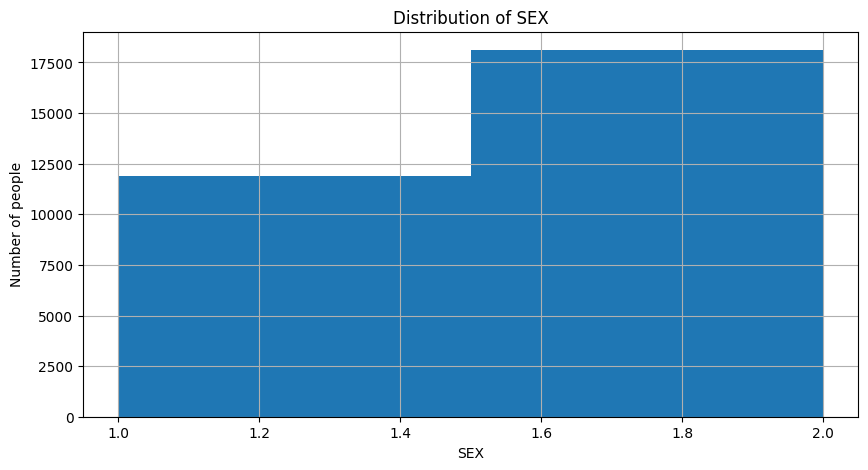

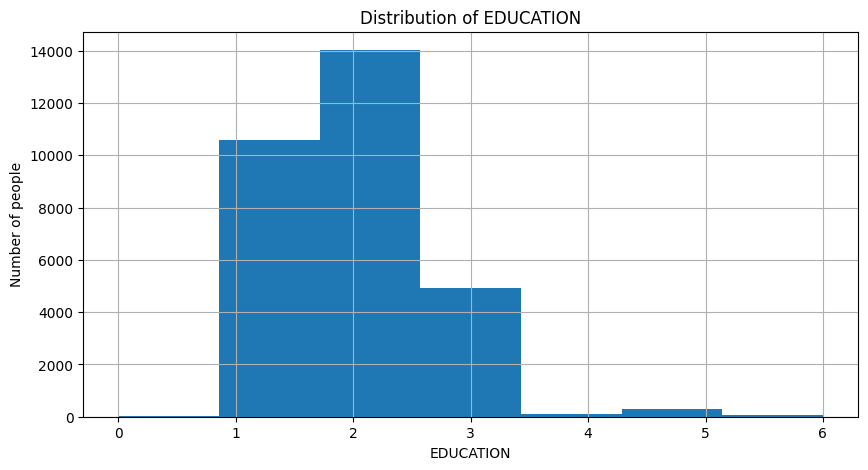

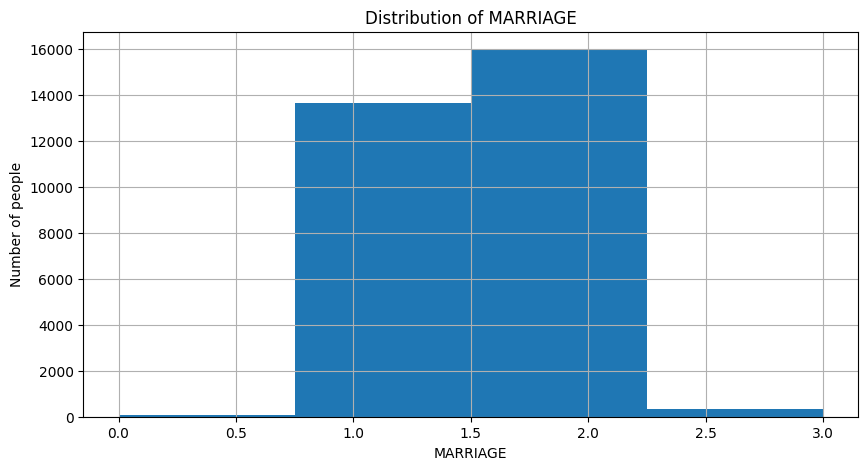

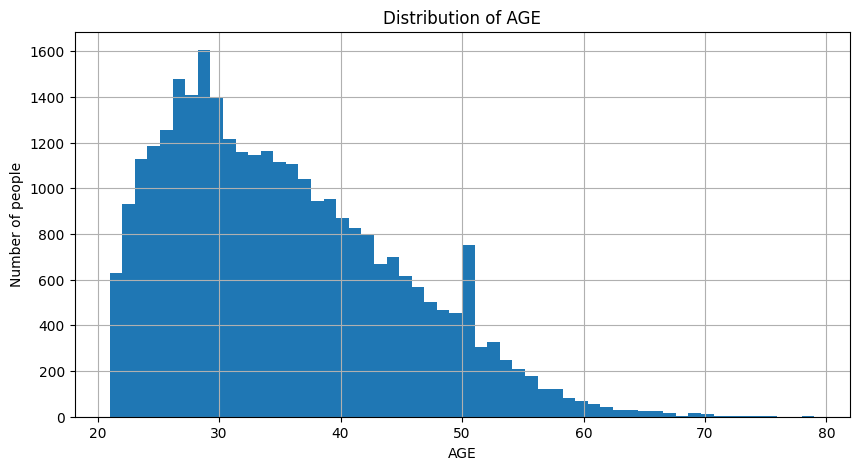

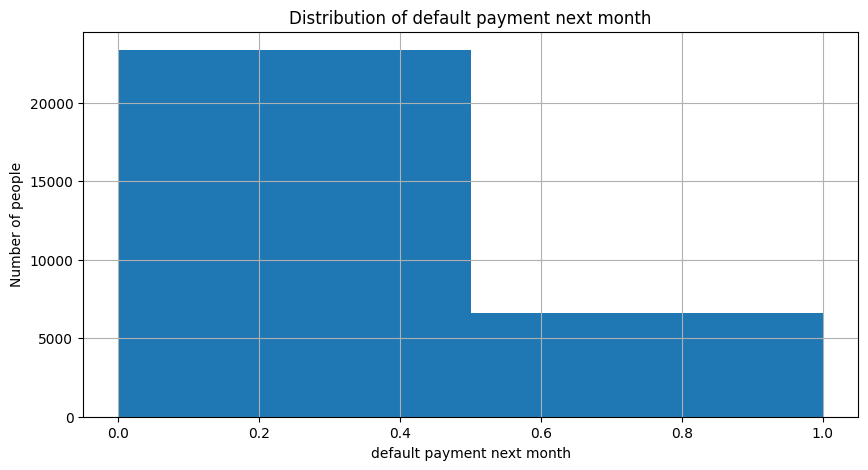

In [6]:
plot_distribution(raw_data, 'LIMIT_BAL') # limit_balance
plot_distribution(raw_data, 'SEX') # sex
plot_distribution(raw_data, 'EDUCATION') # Education
plot_distribution(raw_data, 'MARRIAGE') # Marriage
plot_distribution(raw_data, 'AGE') # Age
plot_distribution(raw_data, 'default payment next month') #default

We can see that our data is imbalanced and has a skewed nature to it. We should try different methods to get a better representation to work on. However, for now let us work with the entire data frame to gain a reference.

Let us do simple preprocessing to get our split datasets ready.

In [7]:
from sklearn.model_selection import train_test_split

# Assuming raw_data is your DataFrame and `defalut payment next month` is the target variable
X = raw_data.drop('default payment next month', axis=1)
y = raw_data['default payment next month']

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set into demographic and time series data
X_demographic_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_train = X_train.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(X_time_series_train.shape[0], X_time_series_train.shape[1], 1)

# Do the same for the validation set
X_demographic_val = X_val[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_val = X_val.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(X_time_series_val.shape[0], X_time_series_val.shape[1], 1)

# And the test set
X_demographic_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_test = X_test.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(X_time_series_test.shape[0], X_time_series_test.shape[1], 1)

In [8]:
# Convert the frame to float32 to work with neural networks
X_time_series_train = X_time_series_train.astype('float32')
X_demographic_train = X_demographic_train.astype('float32')
X_time_series_val = X_time_series_val.astype('float32')
X_demographic_val = X_demographic_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

X_time_series_test = X_time_series_test.astype('float32')
X_demographic_test = X_demographic_test.astype('float32')
y_test = y_test.astype('float32')


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

In [10]:
# Define the model: This will be LSTM using all data...
model = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model.add(LSTM(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for demographic data
model.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7958 - loss: 0.4970 - val_accuracy: 0.8092 - val_loss: 0.4553
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7968 - loss: 0.4743 - val_accuracy: 0.8088 - val_loss: 0.4540
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8065 - loss: 0.4620 - val_accuracy: 0.7820 - val_loss: 0.4780
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8001 - loss: 0.4617 - val_accuracy: 0.8090 - val_loss: 0.4502
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8131 - loss: 0.4506 - val_accuracy: 0.8117 - val_loss: 0.4466
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8016 - loss: 0.4603 - val_accuracy: 0.8083 - val_loss: 0.4523
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8109 - loss: 0.4615 - val_accuracy: 0.8063 - val_loss: 0.4512
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8083 - loss: 0.4617 - val_accuracy: 0.8117 - val_

In [11]:
# Define the model: This will be RNN using all data...
model2 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model2.add(SimpleRNN(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for demographic data
model2.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model2.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7800 - loss: 0.5286 - val_accuracy: 0.7817 - val_loss: 0.5235
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7810 - loss: 0.5245 - val_accuracy: 0.7818 - val_loss: 0.5197
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7748 - loss: 0.5301 - val_accuracy: 0.7818 - val_loss: 0.5204
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7821 - loss: 0.5243 - val_accuracy: 0.7818 - val_loss: 0.5203
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7799 - loss: 0.5260 - val_accuracy: 0.7818 - val_loss: 0.5191
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7788 - loss: 0.5272 - val_accuracy: 0.7818 - val_loss: 0.5259
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7779 - loss: 0.5284 - val_accuracy: 0.7818 - val_loss: 0.5289
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7800 - loss: 0.5265 - val_accuracy: 0.7817 - val_

In [12]:
# Define the model: This will be LSTM using time-series only...
model3 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model3.add(LSTM(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model3.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7934 - loss: 0.5018 - val_accuracy: 0.8077 - val_loss: 0.4540
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8039 - loss: 0.4710 - val_accuracy: 0.8088 - val_loss: 0.4526
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8097 - loss: 0.4588 - val_accuracy: 0.8067 - val_loss: 0.4576
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8081 - loss: 0.4616 - val_accuracy: 0.8052 - val_loss: 0.4512
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8080 - loss: 0.4602 - val_accuracy: 0.8110 - val_loss: 0.4493
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8135 - loss: 0.4521 - val_accuracy: 0.8157 - val_loss: 0.4483
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8115 - loss: 0.4583 - val_accuracy: 0.8110 - val_loss: 0.4464
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8178 - loss: 0.4497 - val_accuracy: 0.8160 - val_

In [13]:
# Define the model: This will be RNN using time-series only...
model4 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model4.add(SimpleRNN(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for binary classification
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model4.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7580 - loss: 0.5450 - val_accuracy: 0.7817 - val_loss: 0.5249
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7818 - loss: 0.5265 - val_accuracy: 0.7818 - val_loss: 0.5220
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7806 - loss: 0.5271 - val_accuracy: 0.7817 - val_loss: 0.5226
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7865 - loss: 0.5192 - val_accuracy: 0.7818 - val_loss: 0.5196
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7784 - loss: 0.5279 - val_accuracy: 0.7818 - val_loss: 0.5205
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7803 - loss: 0.5258 - val_accuracy: 0.7818 - val_loss: 0.5203
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7784 - loss: 0.5304 - val_accuracy: 0.7818 - val_loss: 0.5203
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7854 - loss: 0.5171 - val_accuracy: 0.7818 - val_

In [14]:
def printInfo(model):
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate([X_time_series_test, X_demographic_test], y_test)

    # Print the test loss and test accuracy
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    # Use the model to make predictions on the test set
    y_pred = model.predict([X_time_series_test, X_demographic_test])

    # Print the predictions
    print(f"Predictions: {y_pred}")


    # Get the probabilities
    probabilities = model.predict([X_time_series_test, X_demographic_test])

    # Apply a threshold to get binary outcomes
    y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]

    # Initialize a counter for correct predictions
    correct_predictions = 0
    incorrect_predictions = 0

    incorrect_list = []

    # Loop over the actual values and predictions
    for real, pred in zip(y_test, y_pred):
        # If the prediction matches the actual value, increment the counter
        if real == pred:
            correct_predictions += 1
        if real != pred:
            incorrect_list.append(real)
            incorrect_predictions += 1

    # Print the number of correct predictions
    print(f"Number of correct predictions: {correct_predictions} out of {len(y_test)}")
    print(f"Number of incorrect predictions: {incorrect_predictions}")
    accuracy = correct_predictions / len(y_test)
    print(f"Accuracy: {accuracy}")

    count_zeros = incorrect_list.count(0)
    count_ones = incorrect_list.count(1)

    print(f"Number of 0s: {count_zeros}")
    print(f"Number of 1s: {count_ones}")


In [15]:
printInfo(model)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8207 - loss: 0.4486
Test Loss: 0.4430676996707916
Test Accuracy: 0.8253333568572998
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions: [[0.53515345]
 [0.27937952]
 [0.17346786]
 ...
 [0.17432168]
 [0.69149697]
 [0.19534239]]
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Number of correct predictions: 4952 out of 6000
Number of incorrect predictions: 1048
Accuracy: 0.8253333333333334
Number of 0s: 265
Number of 1s: 783


In [16]:
printInfo(model2)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.7892 - loss: 0.5120
Test Loss: 0.5130049586296082
Test Accuracy: 0.7873333096504211
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions: [[0.2063032 ]
 [0.31742802]
 [0.2793236 ]
 ...
 [0.2904285 ]
 [0.31742802]
 [0.2063032 ]]
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
Number of correct predictions: 4724 out of 6000
Number of incorrect predictions: 1276
Accuracy: 0.7873333333333333
Number of 0s: 5
Number of 1s: 1271


In [17]:
printInfo(model3)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8111 - loss: 0.4434
Test Loss: 0.4370860159397125
Test Accuracy: 0.8159999847412109
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions: [[0.42893243]
 [0.23547332]
 [0.1502518 ]
 ...
 [0.11529344]
 [0.69291925]
 [0.15759341]]
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Number of correct predictions: 4896 out of 6000
Number of incorrect predictions: 1104
Accuracy: 0.816
Number of 0s: 118
Number of 1s: 986


In [18]:
printInfo(model4)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7892 - loss: 0.5128
Test Loss: 0.5136173367500305
Test Accuracy: 0.7873333096504211
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions: [[0.20396742]
 [0.27028495]
 [0.19405328]
 ...
 [0.22463068]
 [0.27028495]
 [0.20396742]]
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Number of correct predictions: 4724 out of 6000
Number of incorrect predictions: 1276
Accuracy: 0.7873333333333333
Number of 0s: 5
Number of 1s: 1271


# Let us try to get a good model based on relevent data only (i.e only time series)

Let us try to make the model more "focused" Lets have layers that look at the one-to-one relation prior to applying a relation overall datapoints.

In [19]:
from keras.layers import Bidirectional

# Define the model
biLSTM = Sequential()

# Add Bidirectional LSTM layer
# Adjust the units and dropout according to your data
biLSTM.add(Bidirectional(LSTM(units=50, dropout=0.2), input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for binary classification
biLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
biLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
biLSTM.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7760 - loss: 0.4989 - val_accuracy: 0.8052 - val_loss: 0.4539
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.4633 - val_accuracy: 0.8058 - val_loss: 0.4493
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8042 - loss: 0.4557 - val_accuracy: 0.8045 - val_loss: 0.4516
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8056 - loss: 0.4522 - val_accuracy: 0.8070 - val_loss: 0.4482
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7959 - loss: 0.4665 - val_accuracy: 0.8092 - val_loss: 0.4515
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8071 - loss: 0.4523 - val_accuracy: 0.8047 - val_loss: 0.4550
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8040 - loss: 0.4655 - val_accuracy: 0.8102 - val_loss: 0.4461
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8103 - loss: 0.4541 - val_accuracy: 0.8018 - val_

In [20]:
printInfo(biLSTM)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8169 - loss: 0.4408
Test Loss: 0.43404459953308105
Test Accuracy: 0.8221666812896729
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions: [[0.56301844]
 [0.19035079]
 [0.13164581]
 ...
 [0.10835679]
 [0.7608899 ]
 [0.17366847]]
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Number of correct predictions: 4933 out of 6000
Number of incorrect predictions: 1067
Accuracy: 0.8221666666666667
Number of 0s: 183
Number of 1s: 884
